In [12]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold

from sklearn.utils.multiclass import type_of_target

from sklearn import preprocessing


In [2]:
df = pd.read_csv('E:\\Vakansy\\magnit\\data_classification_for_task.csv')
#df.dropna(inplace=True)

In [3]:
df.head()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isna().sum()

AGE           0
GENDER        0
FEATURE_1     0
FEATURE_2     0
FEATURE_3     0
FEATURE_4     0
FEATURE_5     0
FEATURE_6     0
FEATURE_7     0
FEATURE_8     0
FEATURE_9     0
FEATURE_10    0
FEATURE_11    0
TARGET        0
dtype: int64

In [11]:
df['TARGET'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: TARGET, dtype: float64

In [5]:
df.columns

Index(['AGE', 'GENDER', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3', 'FEATURE_4',
       'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8', 'FEATURE_9',
       'FEATURE_10', 'FEATURE_11', 'TARGET'],
      dtype='object')

In [6]:
xtrain, xtest, ytrain, ytest=train_test_split(df[['AGE', 'GENDER', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3', 'FEATURE_4',
       'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8', 'FEATURE_9',
       'FEATURE_10', 'FEATURE_11']], df['TARGET'], test_size=0.15)

In [24]:
xgbc = xgb.XGBClassifier() 
print(xgbc)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [25]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [26]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgbc, param_grid, scoring='f1', n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(xtrain, ytrain)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 137 out of 160 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.5s finished


In [27]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.870459 using {'max_depth': 2, 'n_estimators': 50}


In [28]:
xgbc = xgb.XGBClassifier(max_depth=2,n_estimators=50) 
xgbc.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

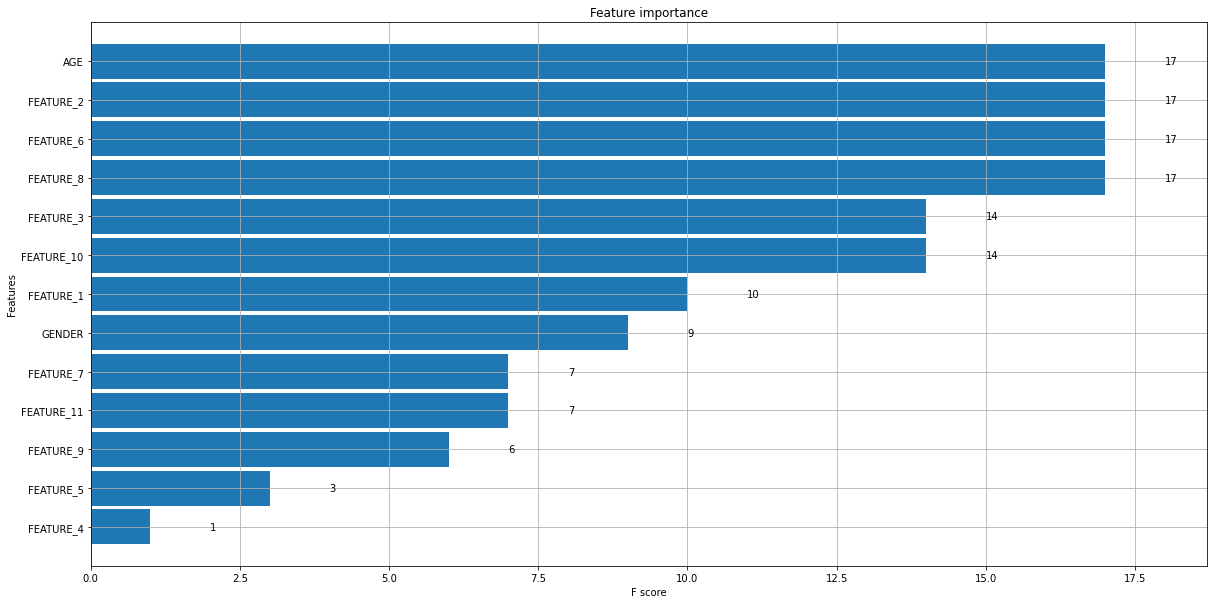

In [29]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(xgbc, height=0.9)

In [30]:
from sklearn.metrics import f1_score

In [32]:
ypred = xgbc.predict(xtest)
f1 = f1_score(ytest, ypred)


In [33]:
f1

0.7636363636363638

# Модель со стандартизированными предикторами

In [34]:
df1 = preprocessing.scale(df[['AGE', 'GENDER', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3', 'FEATURE_4',
       'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8', 'FEATURE_9',
       'FEATURE_10', 'FEATURE_11']])

In [35]:
xtrain, xtest, ytrain, ytest=train_test_split(df1, df['TARGET'], test_size=0.15)

In [36]:
xgbc = xgb.XGBClassifier() 
print(xgbc)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [37]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [38]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgbc, param_grid, scoring='f1', n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(xtrain, ytrain)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 137 out of 160 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.4s finished


In [39]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.844582 using {'max_depth': 2, 'n_estimators': 50}


In [40]:
xgbc = xgb.XGBClassifier(max_depth=2,n_estimators=50) 
xgbc.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

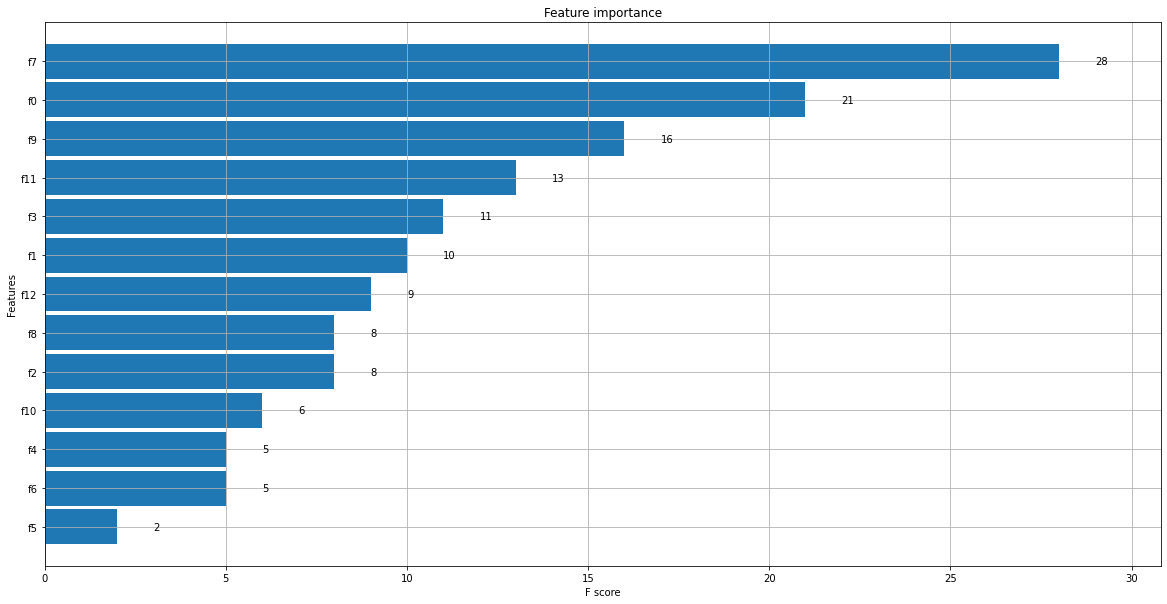

In [41]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(xgbc, height=0.9)

In [42]:
from sklearn.metrics import f1_score

In [43]:
ypred = xgbc.predict(xtest)
f1 = f1_score(ytest, ypred)


In [44]:
f1

0.823529411764706